# Primer entrega

En este proyecto, trabajaremos con un dataset que contiene información sobre personas. La idea es predecir si la persona tiene un salario anual mayor a 50K dólares.
 
### Consignas:

A diferencia de los trabajos que venimos haciendo en clases, en los cuáles nos íbamos guiando por consignas o tips en un notebook, en este caso les toca a ustedes definir qué análisis les parece necesario hacer, qué algoritmo utilizar y qué métrica medir (justificando por qué).
 
La idea es que el notebook sea una especie de "informe" en el que ustedes puedan explicar de forma simple a una persona cualquiera lo que hicieron. Aprovechen las celdas de texto y agreguen los gráficos que les parezca necesarios. Como primer paso, deben identificar si se trata de un problema de regresión o clasificación, hacer un análisis exploratorio de los datos (presentando conclusiones siempre) y finalmente entrenar un modelo para generar sus predicciones.
 
Si les es útil, pueden agregar datos de otras fuentes (por ejemplo datasets públicos del país, o lo que sea) siempre justificando sus decisiones.
 
Son libres de probar cualquiera de los modelos que vimos, pueden dejar los resultados de todo lo que prueben con sus correspondientes conclusiones para mostrar cómo llegan al resultado final.

Se les entrega 3 archivos:
- train.csv: Es el dataset que utilizarán para entrenar su modelo. Contiene features y el target
- test.csv: Este archivo, contiene únicamente features (incluyendo el ID de la persona). Ustedes deben predecir el target para todas estas personas y armar un archivo que contenga las columnas ID, PRED 
- submit_example.csv: El archivo que entreguen tiene que tener exactamente este formato, pero con sus predicciones. Es decir, tiene que contener las columnas ID (que se corresponde al ID de la persona en el set test.csv) y PRED (que toma los valores 1 y 0. 1 significa que la persona gana más de 50K y 0 significa que no).

Deben entregar:
- Notebook con análisis e implementación del modelo predictivo
- Archivo en formato csv con las predicciones para el set de test.

## A tener en cuenta

- En la columna workclass van a ver los valores: 'Self-emp-not-inc' y 'Self-emp-inc' [acá](https://smallbiztrends.com/2013/11/incorporated-versus-unincorporated-self-employment.html) pueden encontrar info sobre su significado.
- Con pandas tienen la función to_csv que les permite exportar un dataframe a csv. Recuerden que tienen que especificar en el parámetro index, que no quieren que el index quede en el archivo csv.

## Archivos

Los archivos necesarios pueden descargarlos de los siguientes links:

- [train.csv](https://drive.google.com/file/d/1fpy7JaVdFlFPHa3kWKmem_E4O7NqhBax/view?usp=sharing)
- [test.csv](https://drive.google.com/file/d/1z927EgBNSOJ3iWorIGz2XEjlrfD0Koaw/view?usp=sharing)
- [submit_example.csv](https://drive.google.com/file/d/1JAdndD1u1F2_TzM-uhArTWW7eepupmuZ/view?usp=sharing)

## Fecha de entrega

La entrega se tiene que enviar por mail (puede ser un link a google drive) a darb302@gmail.com.

1 entrega por grupo.

Por favor indicar el nombre de todos los integrantes en el mail o al comienzo del notebook.

Fecha limite: Viernes 10 de junio de 2022.

----------------------------------------------------------------------------------------

# **0) INTRODUCCIÓN**

Puesto que el objetivo final es predecir en que categoría de ingresos se encuadra cada sujeto (<50k o >50k), se trata de un problema de **clasificación ** que será aborado con el modelo correspondiente.

Se seguirá un procedimiento secuencial que consta de los siguientes pasos:

1- Análisis exploratorio de datos.

2- Features engineering.

3- Data visualization.

4- Mapeo variables categóricas.

5- Model selection.

6- Model training and scoring.

7- Generar predicción para el set de test y exportar a csv.



-------------------------------------------------------------------------

# **1) ANALISIS EXPLORATORIO DE DATOS**

Cargado de librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Montamos Google Drive

In [2]:
from google.colab import drive # La usamos para montar nuestra unidad de Google Drive
drive.mount('/content/drive') # Montamos nuestra unidad de Google Drive

Mounted at /content/drive


Cargamos el set de "train".

Generamos un dataframe con los datos "crudos" y posteriormente generaremos una copia en la cual efectuaremos la limpieza de datos, sin afectar al original

In [3]:
df_crudo = pd.read_csv('/home/asado/Descargas/ICARO Data science/sprint1/train.csv') 

Consultamos encabezado

In [4]:
df_crudo.head(5)

,index,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,ID
0,24466,30,Local-gov,HS-grad,9,Divorced,Protective-serv,Own-child,White,Female,0,0,32,United-States,<=50K,24451
1,985,37,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,1848,40,United-States,>50K,985
2,30250,41,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,United-States,>50K,30229
3,7107,45,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K,7107
4,27656,28,Private,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,<=50K,27639


Y una lista aleatoria de elementos

In [5]:
df_crudo.sample(10, random_state=42) #se impone random_state=42 para que estos elementos aleatorios sean siempre los mismos

,index,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,ID
11333,22561,35,Private,Assoc-acdm,12,Married-civ-spouse,Other-service,Wife,White,Female,0,0,35,United-States,>50K,22552
23361,22639,57,Private,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K,22630
25207,13624,26,Private,HS-grad,9,Never-married,Tech-support,Other-relative,Black,Male,0,0,40,?,<=50K,13621
17805,32211,42,Local-gov,Bachelors,13,Divorced,Prof-specialty,Unmarried,Black,Female,0,0,30,United-States,<=50K,32188
18780,7242,27,Private,HS-grad,9,Divorced,Sales,Unmarried,White,Female,0,0,37,United-States,<=50K,7242
13991,839,50,Private,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1887,50,United-States,>50K,839
14100,15025,25,?,Bachelors,13,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,<=50K,15021
15652,17253,52,Local-gov,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,>50K,17248
26703,7114,53,Private,HS-grad,9,Divorced,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,<=50K,7114
14504,11246,31,Federal-gov,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K,11244


Consultamos dimensión del DataFrame

In [6]:
print(f"El dataset se compone de {df_crudo.shape[0]} filas y {df_crudo.shape[1]} columnas")

El dataset se compone de 27656 filas y 16 columnas


Consultamos los tipos e información general

In [7]:
df_crudo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27656 entries, 0 to 27655
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           27656 non-null  int64 
 1   age             27656 non-null  int64 
 2   workclass       27656 non-null  object
 3   education       27656 non-null  object
 4   education.num   27656 non-null  int64 
 5   marital.status  27656 non-null  object
 6   occupation      27656 non-null  object
 7   relationship    27656 non-null  object
 8   race            27656 non-null  object
 9   sex             27656 non-null  object
 10  capital.gain    27656 non-null  int64 
 11  capital.loss    27656 non-null  int64 
 12  hours.per.week  27656 non-null  int64 
 13  native.country  27656 non-null  object
 14  income          27656 non-null  object
 15  ID              27656 non-null  int64 
dtypes: int64(7), object(9)
memory usage: 3.4+ MB


Tenemos variables tanto numéricas como categóricas. 

En este último grupo (categóricas) todas son todas del tipo nominales, excepto "education" que es de tipo ordinal. 

Se observa que la variable "education.num" es un label encoder de "education", con valores ordenados y ascendentes desde el menor grado de educación ('Preschool'=1) hasta el mayor ('Doctorate'=16)

In [8]:
df_crudo.groupby("education").mean().sort_values("education.num", ascending=True)["education.num"]

education
Preschool        1.0
1st-4th          2.0
5th-6th          3.0
7th-8th          4.0
9th              5.0
10th             6.0
11th             7.0
12th             8.0
HS-grad          9.0
Some-college    10.0
Assoc-voc       11.0
Assoc-acdm      12.0
Bachelors       13.0
Masters         14.0
Prof-school     15.0
Doctorate       16.0
Name: education.num, dtype: float64

Cuantos valores unicos contiene cada variable? Esta pregunta podria ayudarnos a estimar que variables son más o menos informativas.

In [9]:
df_crudo.nunique()/df_crudo.shape[0]*100

index             100.000000
age                 0.263957
workclass           0.032543
education           0.057854
education.num       0.057854
marital.status      0.025311
occupation          0.054238
relationship        0.021695
race                0.018079
sex                 0.007232
capital.gain        0.426671
capital.loss        0.318195
hours.per.week      0.339890
native.country      0.151866
income              0.007232
ID                100.000000
dtype: float64

Vemos que tanto "index" como "ID" son features muy variables, por lo que son grandes candidatas a ser eliminadas del dataset. Dentro de las variables categoricas, "native country" tiene aproximadamente un 15% de valores unicos.

Armamos una lista de las variables categoricas y numericas (excluimos la columna "index" y "ID" que no proporcionan información relevante).

Nuestro target ("income") se encuentra dentro de las categoricas

In [5]:
categoricas_nominales = ["workclass","education","marital.status","occupation","relationship","race","sex","native.country","income"]
numericas = ["age","education.num","capital.gain","capital.loss","hours.per.week"]

## Consulta de valores nulos

In [11]:
df_crudo.isna().sum()

index             0
age               0
workclass         0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
ID                0
dtype: int64

Vemos que no hay valores nulos del tipo NaN o null. Sin embargo existen datos desconocidos que se codificadron con un signo de interrogación "?". Por ejemplo, ver el siguiente registro:

In [4]:
df_crudo[["workclass","occupation"]].iloc[14100,]

workclass     ?
occupation    ?
Name: 14100, dtype: object

Para saber el porcentaje de datos desconocidos en cada variable usamos una funcion iterable que recorra todas las columnas del dataframe

In [13]:
for elem in df_crudo.columns:
    mask = df_crudo[elem] == "?"
    sin_informacion = round(df_crudo[mask].shape[0] / df_crudo.shape[0] *100, 2)
    print(f"{elem }: {sin_informacion}%", end = "\n")

index: 0.0%
age: 0.0%
workclass: 5.56%
education: 0.0%
education.num: 0.0%
marital.status: 0.0%
occupation: 5.59%
relationship: 0.0%
race: 0.0%
sex: 0.0%
capital.gain: 0.0%
capital.loss: 0.0%
hours.per.week: 0.0%
native.country: 1.82%
income: 0.0%
ID: 0.0%


Sólamente hay datos desconocidos en las columnas "workclass", "occupation" y "native.country"

Posteriormente se analizará que tratamiento darle a estos registros

## Exploración de variables categóricas

Construimos una funcion iterable que recorra la lista de variables categoricas y 

- Grafique un coutplot de la variable con los elementos ordenados en orden decreciente.

- Nos indique la cantidad de elementos únicos en esa variable

- Nos indique los 2 valores más frecuentes con sus respectivos porcentajes

- Nos indique la cantidad de registros con información desconocida, inidicados con el caracter "?"

Este procedimiento nos permite ganar comprensión de de todas las variables categóricas para posteriormente depurarlas y entrenar el modelo

Distribución de la variable workclass


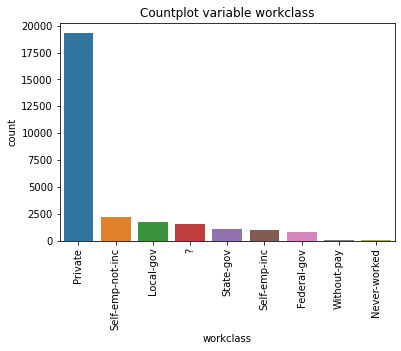

En la variable workclass hay 9 valores únicos
El valor más frecuente es Private (69.71 %), seguido de Self-emp-not-inc (7.8%)
Hay un 5.56% de registros sin información


--------------------------------------------------------------

Distribución de la variable education


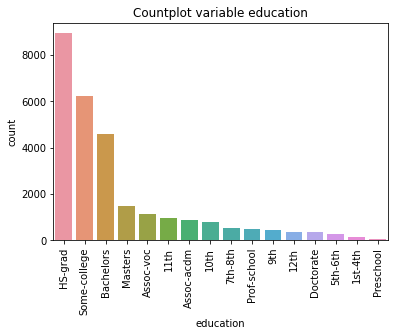

En la variable education hay 16 valores únicos
El valor más frecuente es HS-grad (32.3 %), seguido de Some-college (22.5%)
Hay un 0.0% de registros sin información


--------------------------------------------------------------

Distribución de la variable marital.status


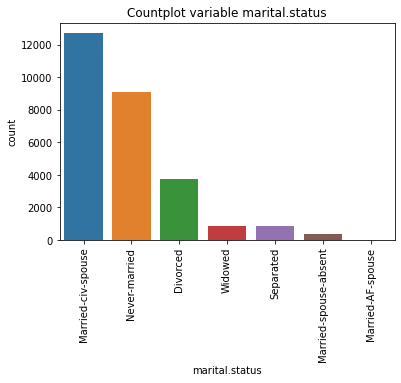

En la variable marital.status hay 7 valores únicos
El valor más frecuente es Married-civ-spouse (45.99 %), seguido de Never-married (32.78%)
Hay un 0.0% de registros sin información


--------------------------------------------------------------

Distribución de la variable occupation


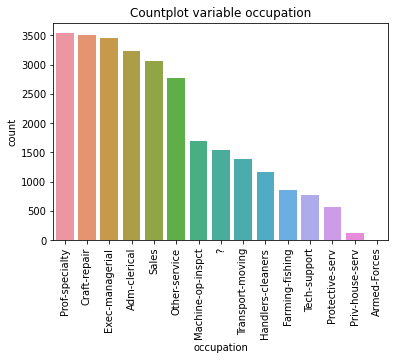

En la variable occupation hay 15 valores únicos
El valor más frecuente es Prof-specialty (12.8 %), seguido de Craft-repair (12.69%)
Hay un 5.59% de registros sin información


--------------------------------------------------------------

Distribución de la variable relationship


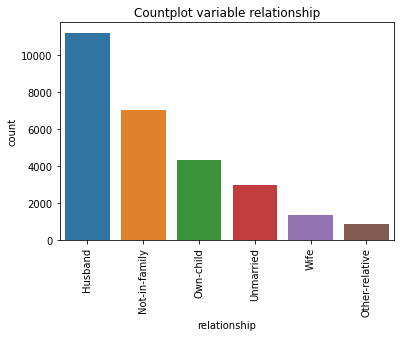

En la variable relationship hay 6 valores únicos
El valor más frecuente es Husband (40.53 %), seguido de Not-in-family (25.31%)
Hay un 0.0% de registros sin información


--------------------------------------------------------------

Distribución de la variable race


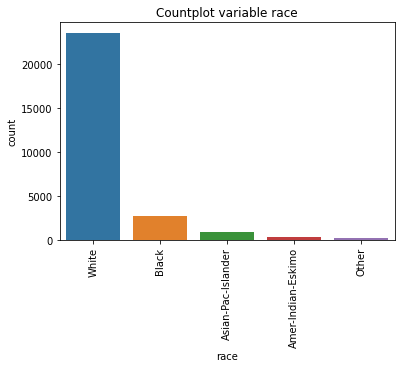

En la variable race hay 5 valores únicos
El valor más frecuente es White (85.41 %), seguido de Black (9.58%)
Hay un 0.0% de registros sin información


--------------------------------------------------------------

Distribución de la variable sex


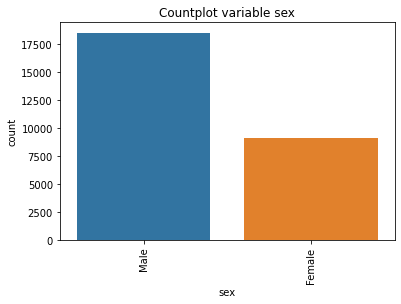

En la variable sex hay 2 valores únicos
El valor más frecuente es Male (66.97 %), seguido de Female (33.03%)
Hay un 0.0% de registros sin información


--------------------------------------------------------------

Distribución de la variable native.country


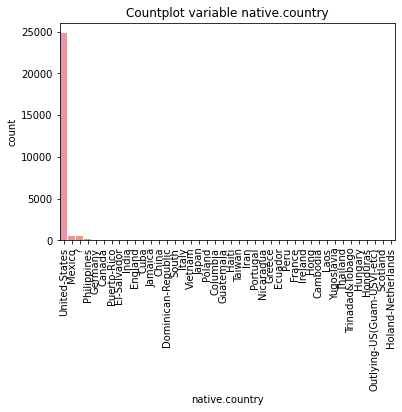

En la variable native.country hay 42 valores únicos
El valor más frecuente es United-States (89.71 %), seguido de Mexico (1.92%)
Hay un 1.82% de registros sin información


--------------------------------------------------------------

Distribución de la variable income


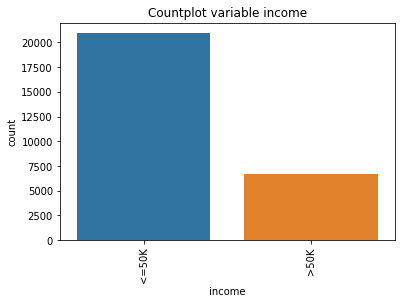

En la variable income hay 2 valores únicos
El valor más frecuente es <=50K (75.76 %), seguido de >50K (24.24%)
Hay un 0.0% de registros sin información


--------------------------------------------------------------



In [14]:
for elem in categoricas_nominales:

  print(f"Distribución de la variable {elem}", end = "\n")

  #Armado del gráfico
  fig = plt.figure()
  ax = plt.axes()
  ax = sns.countplot(x=elem, data=df_crudo, order=df_crudo[elem].value_counts().index)
  plt.xticks(rotation=90)
  plt.title("Countplot variable " + elem)
  plt.show()

  # Cantidad de valores únicos
  print(f"En la variable {elem} hay {df_crudo[elem].nunique()} valores únicos")

  # Informacion de valores más frecuentes
  df_aux = pd.DataFrame(df_crudo.groupby(elem).count()["ID"].sort_values(ascending=False).head(2)) / df_crudo.shape[0] *100
  df_aux.reset_index(drop=False, inplace=True)
  print(f"El valor más frecuente es {df_aux.iloc[0,0]} ({round(df_aux.iloc[0,1],2)} %), seguido de {df_aux.iloc[1,0]} ({round(df_aux.iloc[1,1],2)}%)")

  # Datos sin información ("?")
  mask = df_crudo[elem] == "?"
  sin_informacion = round(df_crudo[mask].shape[0] / df_crudo.shape[0] *100, 2)
  print(f"Hay un {sin_informacion}% de registros sin información", end = "\n\n\n")

  print("--------------------------------------------------------------", end = "\n\n")


Podemos concluir que:
- La mayoria de las observaciones son de trabajadores de sector Privado, por lo que esto podria sesgar las conclusiones que se extraigan ya que en el dataset está subrepresentado el sector público y el sector cuentapropista. [1]
- Existen observaciones de outliers que pertenecen a la categoria "never worked" pero tienen un ingreso >50k. [2]
- La mayoria de las observaciones en el dataset es de personas que tienen una educacion superior a "High school". Además, las personas que realizaron postgrado tienen más probabilidad de ganar >50k.[3]
- La mayoria de las personas del dataset pertenecen a "married". Las observaciones de "never married" tienen mas probabilidad de ganar pertenecer a <50k.[4]
- El dataset está sobrerepresentado de observaciones con ingresos anuales de los Estados Unidos.
- Las observaciones bajo la categoria "white" en la feature race dominan el dataset.[5]
- La mayoria de las observaciones pertenecen a la categoria "male" y estos poseen mas observaciones en la categoria <50k. [6] 
- Vemos que hay datos desconocidos ("?") en las variables "workclass" y "occupation"

In [15]:
#1)
df_crudo['workclass'].value_counts()

Private             19279
Self-emp-not-inc     2156
Local-gov            1769
?                    1539
State-gov            1117
Self-emp-inc          953
Federal-gov           822
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [16]:
#2)
df_crudo.groupby(['workclass', 'income']).size()

workclass         income
?                 <=50K      1377
                  >50K        162
Federal-gov       <=50K       503
                  >50K        319
Local-gov         <=50K      1244
                  >50K        525
Never-worked      <=50K         7
Private           <=50K     15039
                  >50K       4240
Self-emp-inc      <=50K       418
                  >50K        535
Self-emp-not-inc  <=50K      1541
                  >50K        615
State-gov         <=50K       810
                  >50K        307
Without-pay       <=50K        14
dtype: int64

In [17]:
#3)
df_crudo.groupby(['education', 'income']).size()

education     income
10th          <=50K      746
              >50K        48
11th          <=50K      937
              >50K        45
12th          <=50K      336
              >50K        29
1st-4th       <=50K      135
              >50K         4
5th-6th       <=50K      264
              >50K        11
7th-8th       <=50K      505
              >50K        30
9th           <=50K      410
              >50K        19
Assoc-acdm    <=50K      668
              >50K       218
Assoc-voc     <=50K      855
              >50K       292
Bachelors     <=50K     2668
              >50K      1915
Doctorate     <=50K       93
              >50K       259
HS-grad       <=50K     7475
              >50K      1459
Masters       <=50K      643
              >50K       831
Preschool     <=50K       43
Prof-school   <=50K      131
              >50K       364
Some-college  <=50K     5044
              >50K      1179
dtype: int64

In [18]:
#4)
df_crudo.groupby(['relationship', 'income']).size()

relationship    income
Husband         <=50K     6156
                >50K      5052
Not-in-family   <=50K     6274
                >50K       727
Other-relative  <=50K      804
                >50K        33
Own-child       <=50K     4275
                >50K        58
Unmarried       <=50K     2746
                >50K       198
Wife            <=50K      698
                >50K       635
dtype: int64

In [19]:
#5)
df_crudo.groupby(['race', 'income']).size()

race                income
Amer-Indian-Eskimo  <=50K       234
                    >50K         29
Asian-Pac-Islander  <=50K       651
                    >50K        235
Black               <=50K      2328
                    >50K        321
Other               <=50K       214
                    >50K         23
White               <=50K     17526
                    >50K       6095
dtype: int64

In [20]:
#6)
df_crudo.groupby(['sex', 'income']).size()

sex     income
Female  <=50K      8121
        >50K       1014
Male    <=50K     12832
        >50K       5689
dtype: int64

## Exploración de variables numéricas

Distribucion de las variables numericas

In [21]:
round(df_crudo.describe(),2)

,index,age,education.num,capital.gain,capital.loss,hours.per.week,ID
count,27656.00,27656.00,27656.00,27656.00,27656.00,27656.00,27656.00
mean,16274.89,38.61,10.09,1099.99,88.28,40.45,16267.57
std,9410.04,13.66,2.57,7487.32,405.82,12.37,9403.09
min,0.00,17.00,1.00,0.00,0.00,1.00,0.00
25%,8104.75,28.00,9.00,0.00,0.00,40.00,8104.75
50%,16296.00,37.00,10.00,0.00,0.00,40.00,16291.00
75%,24431.25,48.00,12.00,0.00,0.00,45.00,24416.25
max,32559.00,90.00,16.00,99999.00,4356.00,99.00,32535.00


--------------------------------------------------------------------------------

Para conocer la distribución de todas las variables numericas relavantes, creamos una funcion iterable que recorra estas variables y nos devuelva:

- Gráfico de distribución (histograma)
- Gráfico de cajas, para determinar outliers
- Moda (valor más frecuente)
- Media (promedio)
- Mediana (percentil 50%)

Distribución de la variable age


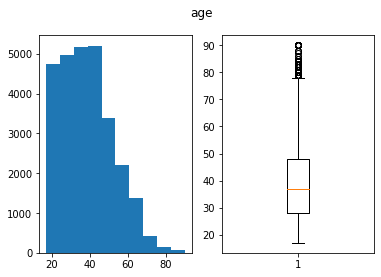

Moda= 36
Media= 38.610355799826436
Mediana= 37.0


Distribución de la variable education.num


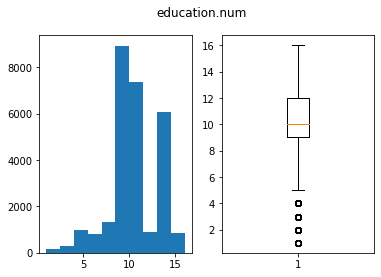

Moda= 9
Media= 10.093505929997107
Mediana= 10.0


Distribución de la variable capital.gain


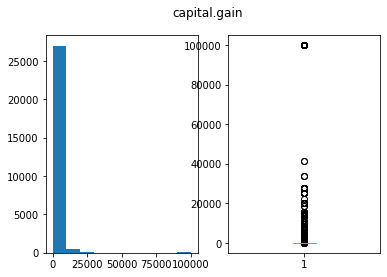

Moda= 0
Media= 1099.9915027480474
Mediana= 0.0


Distribución de la variable capital.loss


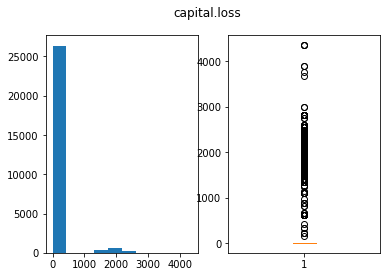

Moda= 0
Media= 88.28438675151865
Mediana= 0.0


Distribución de la variable hours.per.week


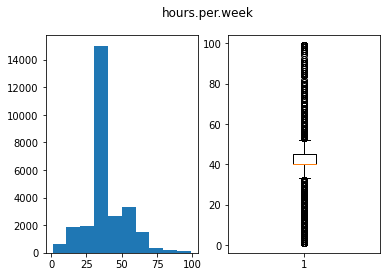

Moda= 40
Media= 40.44666618455308
Mediana= 40.0




In [22]:
import statistics as stat

for elem in numericas:
  print(f"Distribución de la variable {elem}")
  
  # Graficos de histograma y cajas
  fig, axes = plt.subplots(nrows=1, ncols=2)
  fig.suptitle(elem)
  axes[0].hist(df_crudo[elem])
  axes[1].boxplot(x=elem, data=df_crudo)
  plt.show()

  # Moda, media y mediana
  moda=stat.mode(df_crudo[elem])
  print (f"Moda= {moda}")
  print (f"Media= {df_crudo[elem].mean()}")
  print (f"Mediana= {df_crudo[elem].median()}", end = "\n\n\n")


Observando los gráficos de cajas, vemos que todas las variables numéricas tienen gran cantiad de outliers. 
- Los histogramas nos indican que las variables "capital.gain" y "capital.loss" tiene un sesgo muy pesado a la derecha. 
- La mayoria de las observaciones de la variable "capital.gain" y "capital.loss" son 0, por lo que podria estar implicando que la mayoria de las personas del dataset no invierten en el mercado de capitales.
- La mayoria de las observaciones de la variable "age" pertenecen a personas jovenes y hay algunas observaciones de personas mayores a 80 años.

Posteriormente en esta notebook, se analiza que tratamiento darle a estos outliers y distriubuciones sesgadas.

---------------------------------------------------------------------------

# **2) FEATURE ENGINEERING**

Para no modificar el dataset original, generaremos una copia del mismo y seguiremos trabajando en el nuevo dataframe sobre el cual haremos la limpieza de los datos

In [6]:
df = df_crudo.copy()

Para este modelo y para este set de datos en particular, no se consideró conveniente trabajar con elementos pipelines, puesto que:
- No hay valores nulos del tipo NaN o Null que requieran una imputación.
- El filtrado de ouliers se realizará con un criterio específico distinto para cada variable.
- No se requiere normalización de los datos puesto que se trabajará con un modelo de arbol de decisión.

## Consulta y tratamiento de registros duplicados

In [24]:
df.duplicated().sum()
# df.duplicated() devuelve una serie booleana. Si la suma de todos esos elementos es igual a cero, quiere decir que todos los elementos son FALSE

0

Vemos que no hay ningun registro duplicado por lo cual no eliminamos ninguno.

## Tratamiento de valores nulos y desconocidos

Anteriormente se vió que no hay ningun valor nulo del tipo Nan o Null. Verificamos.

In [25]:
df.isna().sum().sum()

0

Sin embargo, en algunas variables categóricas hay cierta cantidad de datos desconocidos indicados con el caracter "?"
- workclass: 5.56%
- occupation: 5.59%
- native.country: 1.82%

Estos datos desconocidos, a diferencia de los nulos, no generarían un error en la ejecución del modelo. A pesar de ello, podría considerarse su eliminación o imputación para mejorar el rendimiento del mismo.A los fines del presente proyecto **no es recomendable eliminar** los registros con datos desconocidos, ya que generará inconvenientes cuando se hagan predicciones sobre el segundo dataset de test.
Se decide mantener estos valores desconocidos pero reemplazar los signos "?" por la leyenda "Desconocido" precedida del nombre de la columna.

In [7]:
reemplazo_workclass = {"?":"workclass DESCONOCIDO"}
df['workclass'] = df['workclass'].replace(reemplazo_workclass)

reemplazo_occupation = {"?":"occupation DESCONOCIDO"}
df['occupation'] = df['occupation'].replace(reemplazo_occupation)

reemplazo_native_country = {"?":"native.country DESCONOCIDO"}
df['native.country'] = df['native.country'].replace(reemplazo_native_country)

## Tratamiento de outliers

Los gráficos de cajas presentados anteriormente permiten observar que todas las variables categóricas presentan gran cantidad de outliers.

Analizaremos cada caso en particular.

Como se explicará más adelante, se usará un modelo de clasificación de tipo arbol, que es mucho menos sensible a outliers que un modelo KNN, no siendo indispensable su filtrado o eliminación

Definimos una función que aplicaremos a cada variable numerica para estudiar los outliers

In [27]:
def estudio_outliers (variable):
  fig, axes = plt.subplots(nrows=1, ncols=2)
  fig.suptitle(variable)
  axes[0].hist(df[variable])
  axes[1].boxplot(x=variable, data=df)
  plt.show()
  percentil_25 = np.percentile(df[variable], 25)
  percentil_50 = np.percentile(df[variable], 50)
  percentil_75 = np.percentile(df[variable], 75)
  print(f"mínimo = {df[variable].min()}")
  print(f"Percentil 0.25 = {percentil_25}")
  print(f"Percentil 0.50 = {percentil_25}")
  print(f"Percentil 0.75 = {percentil_75}")
  print(f"máximo = {df[variable].max()}")

Outliers de la variable "age"

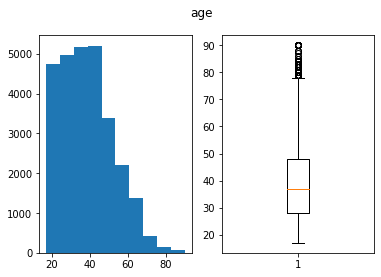

mínimo = 17
Percentil 0.25 = 28.0
Percentil 0.50 = 28.0
Percentil 0.75 = 48.0
máximo = 90


In [28]:
estudio_outliers("age")

La máxima y mínima edad de la serie son respectivamente 90 y 20 años, valores coherentes (no hay errores).

Se observa cierta cantidad de outliers mayores al percentil 0.75 (47 años). 

Se decide mantener estos valores puesto que pueden ser relevante para el análisis



Outliers de la variable "education.num"

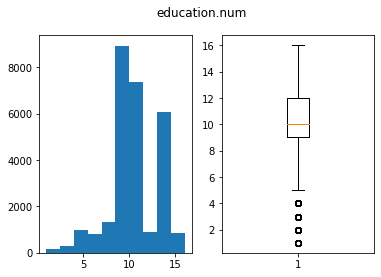

mínimo = 1
Percentil 0.25 = 9.0
Percentil 0.50 = 9.0
Percentil 0.75 = 12.0
máximo = 16


In [29]:
estudio_outliers("education.num")

Se observan outliers debajo del límite inferior. Esta variable es un label encoder de la variable "education". En el siguiente cuadro de código, recordamos la distribución de esta variable.

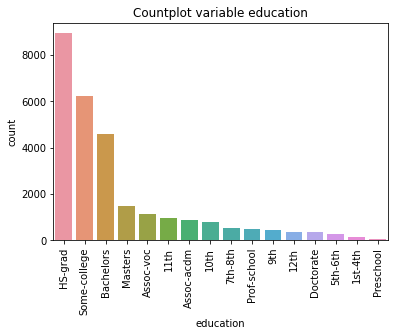

In [30]:
  fig = plt.figure()
  ax = plt.axes()
  ax = sns.countplot(x="education", data=df, order=df["education"].value_counts().index)
  plt.xticks(rotation=90)
  plt.title("Countplot variable education")
  plt.show()

Se observa que los estadíos de menor nivel de educación ("Preschool", "1st-4th", "5th-6th") representan una proporción sumamente baja respecto del total

Se decide mantener los valores de outliers puesto que no se considera que sean valores erróneos y, en consecuéncia, no deberían repercutir en la eficacia del modelo.

Outliers de la variable "capital.gain"

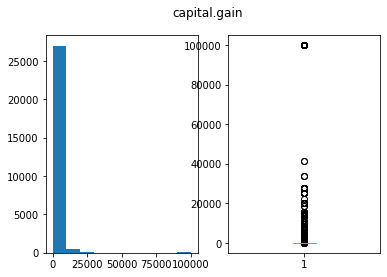

mínimo = 0
Percentil 0.25 = 0.0
Percentil 0.50 = 0.0
Percentil 0.75 = 0.0
máximo = 99999


In [31]:
estudio_outliers("capital.gain")

In [32]:
# porcentaje de valores de "capital.gain" que son iguales a 0
df["capital.gain"].value_counts().head(1) / df.shape[0] * 100

0    91.643766
Name: capital.gain, dtype: float64

La variable "capital.gain" presenta una distribución donde la gran mayoría de los registros son iguales a cero, luego una pequeña cantidad de valores positivos y finalmente una pequeña cantidad en el tope del rango con valores de 99999.

Los ouliers no pueden filtrarse con el criterio de rango intercuartílico porque solo nos quedaríamos con los valores iguales a 0 y se perderían todos los demás. Tampoco se considera apropiado el criterio de 3 sigmas.

Se decide filtrar outlaiers por encima del percentil 98% de la muestra

In [8]:
  mask = df["capital.gain"] < np.percentile(df["capital.gain"], 98)
  df = df[mask]

En la siguiente línea, se observa la nueva distribución de la variable:

In [9]:
estudio_outliers("capital.gain")

NameError: name 'estudio_outliers' is not defined

Outliers de la variable "capital.loss"

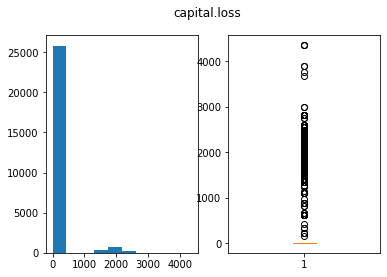

mínimo = 0
Percentil 0.25 = 0.0
Percentil 0.50 = 0.0
Percentil 0.75 = 0.0
máximo = 4356


In [35]:
estudio_outliers("capital.loss")

In [36]:
# porcentaje de valores de "capital.loss" que son iguales a 0
df["capital.loss"].value_counts().head(1) / df.shape[0] * 100

0    95.205758
Name: capital.loss, dtype: float64

El 95% de los valores de "capital.loss" son iguales a 0. Hay una pequeña cantidad de valores en torno a los 2000, y el valor máximo es de 4356.

Los outliers no pueden filtrarse con el criterio de rango intercuartílico porque solo nos quedaríamos con los valores iguales a 0 y se perderían todos los demás. Tampoco se considera apropiado el criterio de 3 sigmas.

Se decide filtrar outliers por encima del percentil 98% de la muestra.

In [37]:
  mask = df["capital.loss"] < np.percentile(df["capital.loss"], 98)
  df = df[mask]

En la siguiente línea, se observa la nueva distribución de la variable:

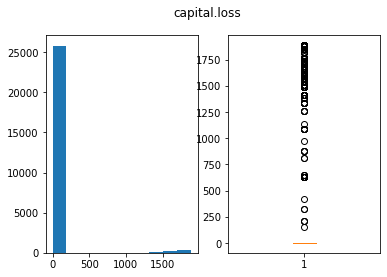

mínimo = 0
Percentil 0.25 = 0.0
Percentil 0.50 = 0.0
Percentil 0.75 = 0.0
máximo = 1887


In [38]:
estudio_outliers("capital.loss")

Outliers de la variable "hours.per.week"

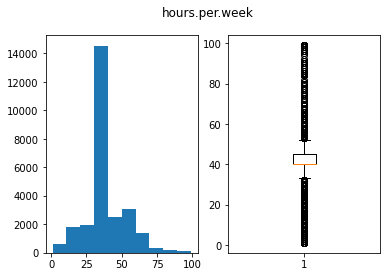

mínimo = 1
Percentil 0.25 = 40.0
Percentil 0.50 = 40.0
Percentil 0.75 = 45.0
máximo = 99


In [39]:
estudio_outliers("hours.per.week")

La distribución presenta outliers tanto bajo el límite inferior, como sobre el límite superior.

Se mantienen los outliiers bajo el límite inferior ya que posiblemente represente a personas desempleadas o de baja ocupación.

Para los outliers por encima del límite superior se presentan valores que podrían ser erroneos. Por ejemplo, el valor máximo de 99 horas semanales, asumiendo 6 días laborables, implica una media de 16.5 horas de trabajo diarias.

Se establece un límite máximo de 60 horas semanales (6 días laborables x 10 horas diarias). Todos los registros por encima de 60 serán reemplazados por el valor de 60.


In [10]:
# Creamos una función auxiliar de reemplazo y posteriormente la aplicamos a toda la serie con un apply lambda
def reemplazo_tope_max (n):
  if n>60:
    return 60
  else:
    return n

In [11]:
df["hours.per.week"] = df["hours.per.week"].apply(lambda x: reemplazo_tope_max(x))

In [12]:
df["hours.per.week"].max() #Comprobamos que efectivamente se la serie se haya topeado en 60

60

En la siguiente línea, observamos la nueva distribución de la variable:

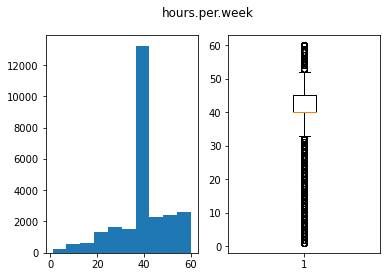

mínimo = 1
Percentil 0.25 = 40.0
Percentil 0.50 = 40.0
Percentil 0.75 = 45.0
máximo = 60


In [43]:
estudio_outliers("hours.per.week")

---------------------------------------------------------------------------------------------

# **3) DATA VISUALIZATION**

En este apartado profundizaremos mas detalladamente la visualización de datos. Estudiaremos como se relacionan las distintas variables entre sí, y como se relaciona cada una de las variables con el target.

Partimos de analizar como se distribuye nuestro target "income".

In [44]:
round(df.groupby("income").count().ID / df.shape[0] * 100, 2)

income
<=50K    78.4
>50K     21.6
Name: ID, dtype: float64

Vemos que solamente el 21.6% del total de individuos tiene un ingreso mayor a 50k (el 78.4% tiene un ingreso menor). 
Este porcentaje del total de individuos por encima de 50k lo guardamos en una variable que usaremos más adelante

In [45]:
X  = round(df.groupby("income").count().ID / df.shape[0] * 100, 2)
porcentaje_total_mayor50k = X[1]
porcentaje_total_mayor50k

21.6

Esto nos delimita una línea de base o umbral mínimo, puesto que un algoritmo simple con la solución trivial "todos los individuos ganan menos de 50k" tendría una precisión del 78.4%.

El modelo de predicción que desarrollemos deberá tener una precisión mayor a esta.

Analizaremos primero como se relacionan las variables categóricas con el target.

Para ello construimos una función que haga lo siguiente:
- Reciba el nombre de la columna o variable que queremos estudiar

- Determine la cantidad de elementos únicos (o subgrupos) dentro de esa variable

- Para cada uno de estos subgrupos, determine la probabilidad (o porcentaje de individuos) que superan el ingreso de 50k

- Volcar la información anterior en un gráfico de barras, incluyendo también la línea media

El siguiente gráfico muestra la probabilidad de income>50k para cada uno de los distintos "workclass"

In [46]:
def calculo_prob_mayor50k_2 (columna):                                                           #Ahora se la renombro calculo_prob_mayor50k_2

  #Creo la lista de únicos de la variable y una lista de probabilidades inicialmente vacía
  lista_unicos = df[columna].unique()
  lista_prob_mayor50k = []

  #Recorro cada elemento unico de la clase y calculo la probabilidad de que su ingreso sea >50k
  for unico in lista_unicos:
    cantidad_registros = df[df[columna] == unico].ID.count()
    cantidad_registros_mayores50k = df[(df[columna] == unico) & (df["income"] == ">50K")].ID.count()
    probabilidad_mayor50k = round(100 * cantidad_registros_mayores50k / cantidad_registros, 2)
    lista_prob_mayor50k.append(probabilidad_mayor50k)

  #Armo un df con el listado de unicos y la probabilidad de que sea >50k
  diccionario_2 = {"Subgrupo": lista_unicos, "prob_income>50k": lista_prob_mayor50k} #se crea diccionario_2
  df_mayores50k = pd.DataFrame(data=diccionario_2) #se crea diccionario_2
  df_mayores50k = df_mayores50k.sort_values("prob_income>50k", ascending=False)

  #Gráfico de barras ordenado
  fig = plt.figure()
  ax = plt.axes()
  ax=sns.barplot(x="Subgrupo", y="prob_income>50k", data=df_mayores50k)
  ax.axhline(df_mayores50k["prob_income>50k"].mean(), color='red', linewidth=2, linestyle='--')
  plt.xticks(rotation=90)
  plt.title("probabilidad de income>50k para la variable "+columna)
  plt.show()


Con esta función creada, la aplicaremos a cada variable categórica para conocer como se relacionan con el target

Comenzamos con la variable "workclass". 

Puede observarse que los subgrupos 'Self-emp-inc' y 'Federal-gov' tienen una probabilidad de income>50k mayor que la media.

Por su parte, y como es de esperarse, el subgrupo de los que no reciben pago alguno ('Without-pay' y 'Never-Worked') tienen una probabilidad del 0% de superar el ingreso de 50k

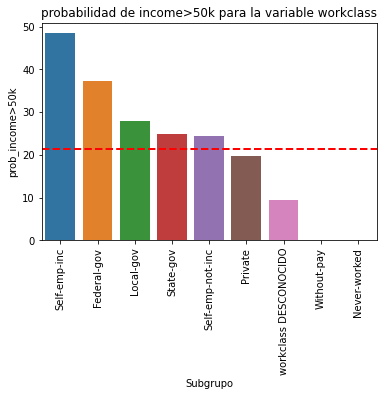

In [47]:
calculo_prob_mayor50k_2("workclass")

Continuamos con la variable "education".

Se observa una muy clara correlación entre el nivel educativo y el target. Los niveles educativos más altos ('Doctorate', 'Prof-school' y 'Masters') tienen probabilidades muy por encima de la media, en tanto los niveles educativos más bajos ('Preschool', '1st-4th', '5th-6th') tienen probabilidades sumamente bajas de superar un income anual >50 k.


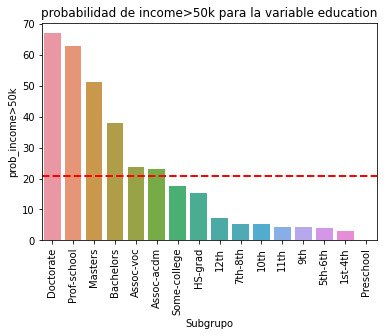

In [48]:
calculo_prob_mayor50k_2("education")

Con respecto a la variable "marital.status" se ve que los subgrupos 'Married-AF-spouse' y 'Married-civ-spouse' tienen una probabilidad mucho más alta de superar el target.

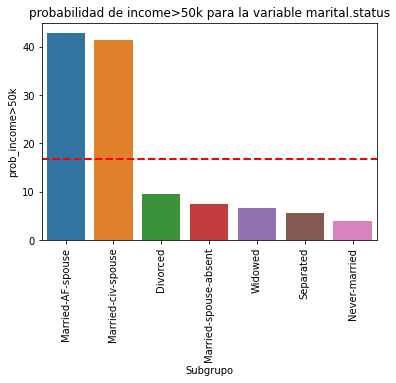

In [49]:
calculo_prob_mayor50k_2("marital.status")

Para la variable "occupation", las mayores probabilidades de alcanzar el target se da para las profesiones 'Exec-managerial' y 'Prof-specialty', en tanto en el extremo contrario se encuentran 'Armed-Forces' y 'Priv-house-serv' con probabilidades nulas de superar el target anual >50 k.

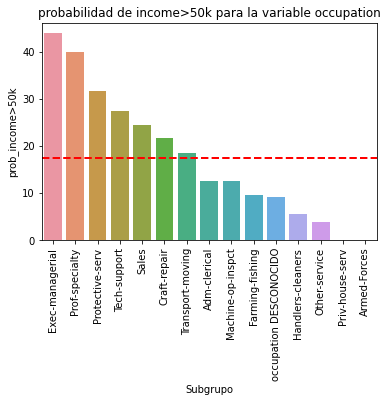

In [50]:
calculo_prob_mayor50k_2("occupation")

Variable "relationship", las mayores probabilidades se dan para estados civiles "Wife" y "Husband".

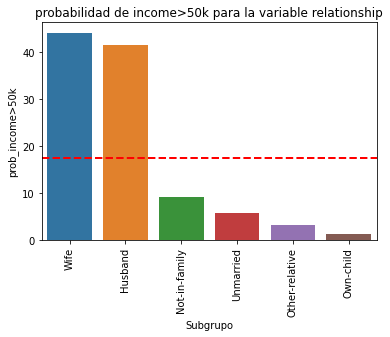

In [51]:
calculo_prob_mayor50k_2("relationship")

Variable "race", la mayor probabilidad de superar el target corresponde a 'Asian-Pac-Islander' y 'White', en tanto la menor corresponde al grupo "Other".

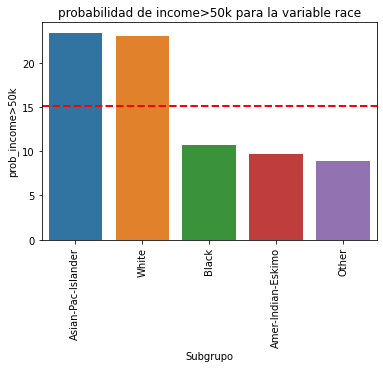

In [52]:
calculo_prob_mayor50k_2("race")

La variable "sex" muestra que los hombres (categoría 'Male') tienen muchas más chances de superar el target anual que las mujeres ('Female').

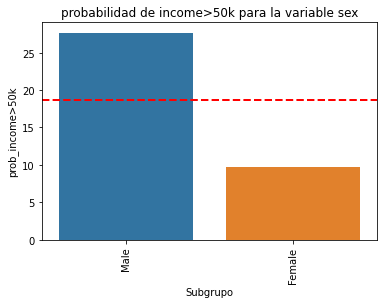

In [53]:
calculo_prob_mayor50k_2("sex")

Variable "native.country": 

- India encabeza la serie. 
-Estados Unidos (país en el que se realizó el estudio), se encuentra a mitad de posición y tiene probabilidades de superar el target ligeramente por encima de la media. 
-Entre las nacionalidades con menor probabilidad de superar el target se encuentran varias naciones latinoamericanas (Honduras, Trinidad y Tobago, República Dominicana, etc)

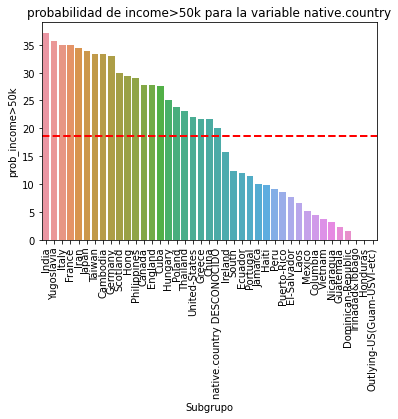

In [54]:
calculo_prob_mayor50k_2("native.country")

Finalizado el análisis de variables categóricas, se observa que todas guardan una alta correlación con el target y por ende son relevantes para el modelo.

Se procede ahora a estudiar el comportamiento de las variables numéricas. Para ello, corremos el comando pairplot, discriminando elementos según cumplen o no con con el target (<=50k en azul, >50k naranja).

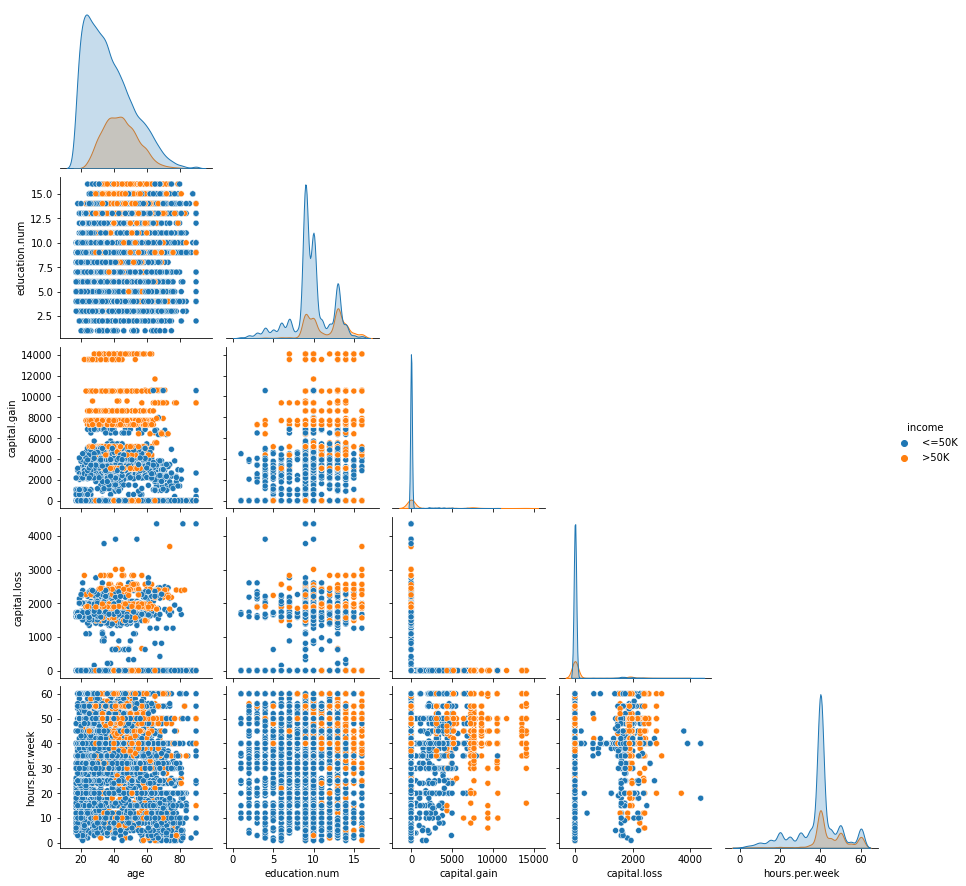

In [13]:
df_numericas_income = df[["age", "education.num", "capital.gain", "capital.loss", "hours.per.week", "income"]] #creamos un df auxiliar que contenga las variables numericas relevantes y la variable target

sns.pairplot(df_numericas_income, hue="income", corner=True)

Sistematizamos el procesamiento de la información anterior analizando primero los histogramas y luego los graficos de dispersión.

###Histogramas

- Variable "age": Para el subgrupo de los que cumplen el target (curva naranja), la mayor densidad de poblacional se encuentra en torno a los 40-50 años. Para los que no cumplen el target (curva azul), la mayor densidad se encuentra en 20-25 años.

- Variable "education.num": no parecen observarse individuos que cumplan el target con menos de 8 años de educación.

- Variables "capital.gain" y "capital.loss": presentan una distribución particular donde la casi totalidad de los elementos, cumplan o no con el target, valen cero.

- Variable "hours.per.week: del subgrupo de los que cumplen con el target, no parece haber gran cantidad de individuos que trabajen menos de 35 horas semanales, y el pico de densidad se da en torno a las 40 horas. Del subgrupo de los que no cumplen con el target, el pico de densidad también se da a las 40 horas.

###Gráficos de dispersión

La gran cantidad de registros (24521) torna un tanto compleja la interpretación de los gráficos de dispersión. Aun asi, al haber discriminado los puntos con el parámetro hue="income", puede observarse que la mayor concentración de puntos naranjas (>50k) se encuentran presentes en las zonas de alto "capital.gain", alto "education.num" y alto "hours.per.week".

El hecho de que todas las variables numéricas estén relacionadas con el target (salvo "capital.loss" que no resulta claro) implica que todas estas variables deberán estar incluidas en el modelo de predicción

###Correlación

Analizamos la matriz de correlación.

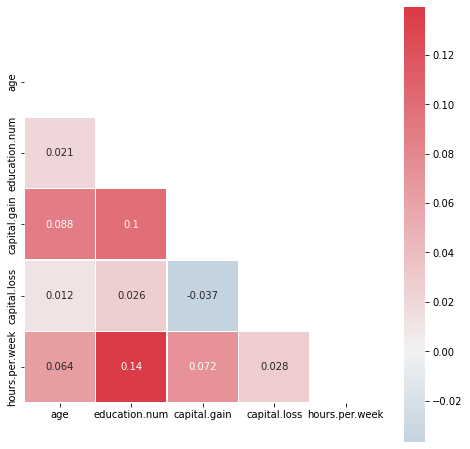

In [56]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_numericas_income.corr(), dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_numericas_income.corr(), mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, annot=True)

No se aprecia una correlación fuerte (positiva ni negativa) de las variables numéricas entre sí, por lo que asumimos que la colinealidad en el dataset es baja.

------------------------------------------------------------------------------------------

# **4) MAPEO DE VARIABLES CATEGORICAS**

Resumiendo, hasta aquí:
- Las variables "index" e "ID" no son relevantes para el análisis y no serán utilizadas para el modelo.

- Todas las variables categóricas guardan relación con el target y deberían ser consideradas para el modelo predictivo.

- Todas las variables numéricas guardan relación con el target y deberían ser consideradas para el modelo predictivo.

- Se descarta la variable categórica "education". Utilizaremos para el modelo la variable numérica "education.num" que es un label encoder ordenado de la misma.


Creamos un nuevo dataframe a partir del anterior sobre el cual efectuaremos el encoded de variables categóricas y otras transformaciones

In [14]:
df_encoded = df.copy() 
df_encoded = df_encoded.drop(["index", "ID", "education"], axis=1)

In [15]:
df_encoded.shape

(27095, 13)

Mapeamos nuestra variable target "income" asignando 

- "<=50K" = 0
- ">50K" = 1

In [16]:
map_income = {'<=50K':0,
            '>50K':1}

df_encoded['income'] = df_encoded['income'].replace(map_income)

Mapearemos ahora todas las variables categóricas. Recordemos que al haber descartado la columna education (la única ordinal), son todas del tipo "nominal"

Definimos una lista de todas estas variables (excluyendo el target) y luego creamos una función que realice las siguientes operaciones
- Para cada uno de los features categóricos, aplicamos el metodo get_dummies.
- La salida del get_dummies la concatenamos al DataFrame de datos.
- Eliminamos la columna original que contenía la variables categórica.

In [17]:
features_categoricas = ["workclass", "marital.status", "occupation", "relationship", "race", "sex", "native.country"]

In [18]:
variable = "workclass"

dummies = pd.get_dummies(df_encoded[variable]) # Obtenemos dummies
df_encoded = pd.concat([df_encoded, dummies], axis=1) # Concatenamos horizontalmente con axis=1
df_encoded = df_encoded.drop(variable, axis=1)


In [19]:
variable = "marital.status"

dummies = pd.get_dummies(df_encoded[variable]) # Obtenemos dummies
df_encoded = pd.concat([df_encoded, dummies], axis=1) # Concatenamos horizontalmente con axis=1
df_encoded = df_encoded.drop(variable, axis=1)

In [20]:
variable = "occupation"

dummies = pd.get_dummies(df_encoded[variable]) # Obtenemos dummies
df_encoded = pd.concat([df_encoded, dummies], axis=1) # Concatenamos horizontalmente con axis=1
df_encoded = df_encoded.drop(variable, axis=1)

In [21]:
variable = "relationship"

dummies = pd.get_dummies(df_encoded[variable]) # Obtenemos dummies
df_encoded = pd.concat([df_encoded, dummies], axis=1) # Concatenamos horizontalmente con axis=1
df_encoded = df_encoded.drop(variable, axis=1)

In [22]:
variable = "race"

dummies = pd.get_dummies(df_encoded[variable]) # Obtenemos dummies
df_encoded = pd.concat([df_encoded, dummies], axis=1) # Concatenamos horizontalmente con axis=1
df_encoded = df_encoded.drop(variable, axis=1)

In [23]:
variable = "sex"

dummies = pd.get_dummies(df_encoded[variable]) # Obtenemos dummies
df_encoded = pd.concat([df_encoded, dummies], axis=1) # Concatenamos horizontalmente con axis=1
df_encoded = df_encoded.drop(variable, axis=1)

In [24]:
variable = "native.country"

dummies = pd.get_dummies(df_encoded[variable]) # Obtenemos dummies
df_encoded = pd.concat([df_encoded, dummies], axis=1) # Concatenamos horizontalmente con axis=1
df_encoded = df_encoded.drop(variable, axis=1)

Dimensiones finales del DataFrame

In [25]:
print (f"Nuestro DataFrame mapeado y listo para construir el modelo tiene en total {df_encoded.shape[0]} filas y {df_encoded.shape[1]} columnas, \n de las cuales una de ellas (income) es nuestro target ")

Nuestro DataFrame mapeado y listo para construir el modelo tiene en total 27095 filas y 92 columnas, 
 de las cuales una de ellas (income) es nuestro target 


Creamos finalmente nuestro subconjunto de features (X) y nuestro target (y). A partir de ellos entrenaremos el modelo

In [26]:
X = df_encoded.drop("income", axis=1)
y = df_encoded["income"].copy()

-------------------------------------------------------------------------------------------------

# **5) MODEL SELECTION**

Como se mencionara anteriormente, el problema propuesto es de tipo CLASIFICACION y para abordarlo se decidió emplear un modelo del tipo árbol de decisión, utilizando Decision-Tree Classifier de la librería Scikit-learn.

Importamos el elemento de la libreria y posteriormente lo instanciaremos

In [27]:
from sklearn.tree import DecisionTreeClassifier

------------------------------------------------------------------------------------------

# **6) MODEL TRAINING AND SCORING**

Realizamos la subdivisión de nuestros features "X" y nuestro target "y" en un set de train y otro de test.

- Se adopta una distribución 80%-20% entre ambos conjuntos
- Se asigna el parámetros opcional random_state=42 para que el subconjunto de elementos aleatorios se mantenga invariante en cada ejecución
- Se asigna stratify=y para que el set de train y de test tengan el mismo porcentaje de targets positivos 

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Verificamos que efectivamente los target positivos se hayan distribuido homogéneamente

In [72]:
print (f"El porcentaje de target positivo en el set de train es {100*round(y_train.mean(),4)} % y en el set de test {100*round(y_test.mean(),4)} %")


El porcentaje de target positivo en el set de train es 21.6 % y en el set de test 21.6 %


Realizaremos un análisis de sensibilidad para distintos valores del hiperparámetro "max_depth" para hallar una solución óptima que no incurra en overfitting ni underfitting.

Para ello primeramente debemos definir que métrica utilizaremos para evaluar la bondad del modelo:
- a) Accuracy score
- b) Precision
- c) Recall
- d) F1 Score

Puesto que el target se encuentra desbalanceado (22% positivo y 78% negativo) la métrica "accuracy score" no resultaría la más apropiada. Por ejemplo, la solución trivial "nadie gana más que 50k" tendría un alto  accuracy score de 78%.

Las métricas "Precision" y "Recall", en cierta forma, compiten entre sí. Utilizaremos entonces la métrica "F1 Score" que busca un equilibrio entre ambas.

In [29]:
from sklearn.metrics import f1_score

Se realizará el cálculo para 20 valores distintos de "max_depth".  Para cada uno de ellos entrenamos el arbol, generamos predicciones de train, test y almacenamos los resultados en 2 listas (que inicialmente creamos vacias).

In [30]:
max_depths = np.arange(1, 20)

In [31]:
train_fscores = []
test_fscores = []

Creamos la función iterable que realice este procedimiento

In [32]:
for i in max_depths:
  tree = DecisionTreeClassifier(max_depth=i)  #Instancia el elemento con el valor de max_depth de esa iteración

  tree.fit(X_train, y_train)
  train_preds = tree.predict(X_train)
  test_preds = tree.predict(X_test)

  train_fscores.append(f1_score(y_train, train_preds))
  test_fscores.append(f1_score(y_test, test_preds))

Ploteamos los resultados

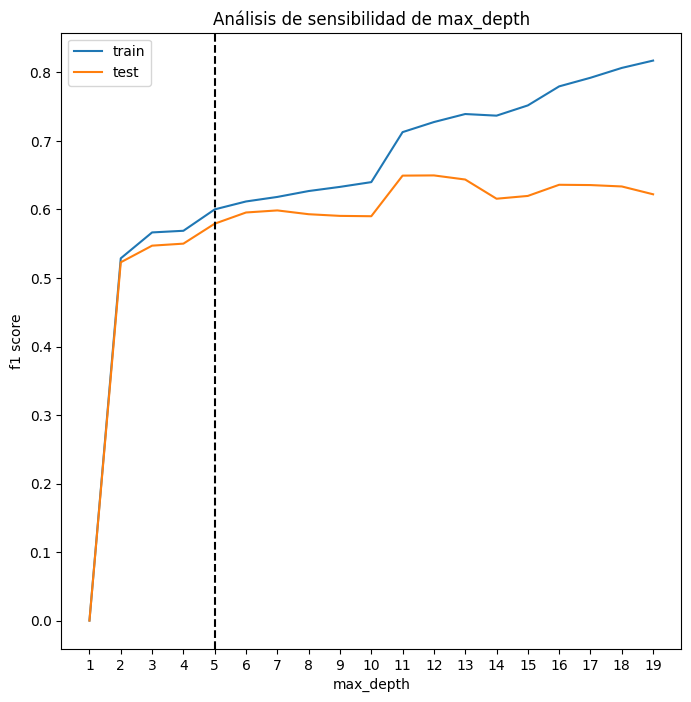

In [33]:
plt.figure(figsize=(8,8))

plt.plot(max_depths, train_fscores, label="train")
plt.plot(max_depths, test_fscores,  label="test")
plt.title ("Análisis de sensibilidad de max_depth")
plt.axvline(5, color='black', linestyle='--')
plt.xlabel('max_depth')
plt.ylabel('f1 score')
plt.xticks(max_depths)
plt.legend()

En base a la gráfica anterior se considera que la profundidad óptima del árbol es 5, puesto que con esta se alcanzan valores relativamente altos de f1 (no hay underfitting) y los set de train y test performan de manera similar (no hay overfitting).

Entrenamos nuevamente el árbol para la profundidad óptima y graficamos la matriz de confusión.

/home/asado/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


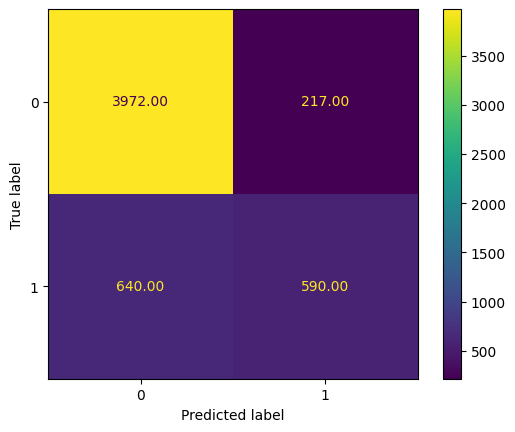

In [34]:
from sklearn.metrics import plot_confusion_matrix
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_train, y_train)
plot_confusion_matrix(tree, X_test, y_test, values_format = '.2f')
plt.show()

Evaluamos ahora todas las métricas para este árbol de profundidad óptima.

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, tree.predict(X_test)))

arbol = print(classification_report(y_test, tree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4189
           1       0.73      0.48      0.58      1230

    accuracy                           0.84      5419
   macro avg       0.80      0.71      0.74      5419
weighted avg       0.83      0.84      0.83      5419

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4189
           1       0.73      0.48      0.58      1230

    accuracy                           0.84      5419
   macro avg       0.80      0.71      0.74      5419
weighted avg       0.83      0.84      0.83      5419



El modelo de clasificación desarrollado tiene una precisión del 84%, 6 puntos porcentuales mayor que la solución trivial o nivel de base (78%)

Representamos gráficamente el árbol

In [36]:
from sklearn.tree import plot_tree

fn= X.columns #crea una lista con los nombres de columnas (features)
cn=['<=50k', '>50k'] #crea una lista con las distintos valores de target
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (60,10), dpi=300)
plot_tree(tree,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('drive/MyDrive/Sprint1-Grupo5/GRUPAL/ImagenArbol.png')  #CAMBIAR AQUI LA RUTA


FileNotFoundError: [Errno 2] No such file or directory: 'drive/MyDrive/Sprint1-Grupo5/GRUPAL/ImagenArbol.png'

Error in callback <function flush_figures at 0x7f46317373a0> (for post_execute):


KeyboardInterrupt: 

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Para seguir indagando en la calidad del modelo, calcularemos la curva ROC (Receiver Operating Characteristic).

Esta métrica de clasificación nos indica que tan
bien nuestro modelo puede distinguir entre 2 clases de la variable target.

In [81]:
# Importamos algunos elementos
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

In [82]:
# Aplicamos un one hot enconding a el target con label_binarize.
y_test_BINARIO = label_binarize(y_test, classes=[1, 0])   #Para que funcione bien hubo que poner [1, 0] en lugar de [0, 1]
n_classes = y_test_BINARIO.shape[1]
print(y_test[:5])

1223     0
13550    0
11386    0
199      1
6167     1
Name: income, dtype: int64


In [83]:
# predict_proba calcula la probabilidad de cada clase
y_score = tree.predict_proba(X_test)
print(y_score[:5])

[[0.98561151 0.01438849]
 [0.98650242 0.01349758]
 [0.98650242 0.01349758]
 [0.3115653  0.6884347 ]
 [0.3115653  0.6884347 ]]


In [84]:
# Para cada clase calculamos las tasas de falsos positivos y verdaderos positivos
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_BINARIO[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

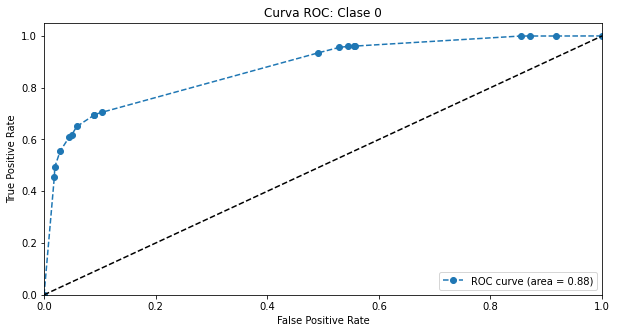

In [85]:
# Graficamos la curva ROC
for i in range(n_classes):
    plt.figure(figsize=(10,5))
    plt.plot(fpr[i], tpr[i],'o--', label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curva ROC: Clase ' + str(i))
    plt.legend(loc="lower right")
    plt.show()

La forma de la curva y el área bajo la misma (0.88) indican que el modelo de clasificación es efectivo para separar entre las 2 clases que puede adoptar el target (income>50k e income<=50k).






**CONCLUSIÓN:**

**Todas las métricas hasta aquí consideradas permiten concluir que la seleccion de variables fue eficáz y que el modelo de clasificación desarrollado es idóneo para realizar predicciones**

------------------------------------------------------------------------------------------

# **7) GENERAR PREDICCIÓN SOBRE EL DATAFRAME DE TEST Y EXPORTAR .csv**

Teniendo el modelo final ya entrenado y optimizado, cargamos el segundo dataset (el que no tiene datos de target).

In [86]:
df_2 = pd.read_csv('drive/MyDrive/Sprint1-Grupo5/GRUPAL/test.csv')

Chequeamos que no haya valores nulos ente este nuevo dataset.

In [87]:
df_2.isna().sum()

index             0
age               0
workclass         0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
ID                0
dtype: int64

Al igual que como hicimos con el dataset original, reemplazamos los datos desconocidos "?" por la layenda "DESCONOCIDO" precedida del nombre de la columna

In [88]:
reemplazo_workclass = {"?":"workclass DESCONOCIDO"}
df_2['workclass'] = df_2['workclass'].replace(reemplazo_workclass)

reemplazo_occupation = {"?":"occupation DESCONOCIDO"}
df_2['occupation'] = df_2['occupation'].replace(reemplazo_occupation)

reemplazo_native_country = {"?":"native.country DESCONOCIDO"}
df_2['native.country'] = df_2['native.country'].replace(reemplazo_native_country)

Para generar predicciones sobre este nuevo dataframe, primeramente debemos hacer encoding de las variables categóricas.

In [89]:
variable = "workclass"

dummies = pd.get_dummies(df_2[variable]) # Obtenemos dummies
df_2 = pd.concat([df_2, dummies], axis=1) # Concatenamos horizontalmente con axis=1
df_2 = df_2.drop(variable, axis=1)


In [90]:
variable = "marital.status"

dummies = pd.get_dummies(df_2[variable]) # Obtenemos dummies
df_2 = pd.concat([df_2, dummies], axis=1) # Concatenamos horizontalmente con axis=1
df_2 = df_2.drop(variable, axis=1)

In [91]:
variable = "occupation"

dummies = pd.get_dummies(df_2[variable]) # Obtenemos dummies
df_2 = pd.concat([df_2, dummies], axis=1) # Concatenamos horizontalmente con axis=1
df_2 = df_2.drop(variable, axis=1)

In [92]:
variable = "relationship"

dummies = pd.get_dummies(df_2[variable]) # Obtenemos dummies
df_2 = pd.concat([df_2, dummies], axis=1) # Concatenamos horizontalmente con axis=1
df_2 = df_2.drop(variable, axis=1)

In [93]:
variable = "race"

dummies = pd.get_dummies(df_2[variable]) # Obtenemos dummies
df_2 = pd.concat([df_2, dummies], axis=1) # Concatenamos horizontalmente con axis=1
df_2 = df_2.drop(variable, axis=1)

In [94]:
variable = "sex"

dummies = pd.get_dummies(df_2[variable]) # Obtenemos dummies
df_2 = pd.concat([df_2, dummies], axis=1) # Concatenamos horizontalmente con axis=1
df_2 = df_2.drop(variable, axis=1)

In [95]:
variable = "native.country"

dummies = pd.get_dummies(df_2[variable]) # Obtenemos dummies
df_2 = pd.concat([df_2, dummies], axis=1) # Concatenamos horizontalmente con axis=1
df_2 = df_2.drop(variable, axis=1)

Dropeamos la columna "education", "index" e "ID", al igual que hicimos con el DataFrame original

In [96]:
df_2 = df_2.drop(["education", "index", "ID"], axis=1)

Dimensiones del DataFrame

In [97]:
print (f"Nuestro DataFrame mapeado y listo para construir el modelo tiene en total {df_2.shape[0]} filas y {df_2.shape[1]} columnas")

Nuestro DataFrame mapeado y listo para construir el modelo tiene en total 4881 filas y 88 columnas


Ahora, a partir del modelo previamente entrenado, deberíamos generar las predicciones para el segundo dataset

Se realizó una primera prueba pero no fue posible lograrlo, puesto que la cantidad de columnas en el nuevo dataframe "df_2" no coincide exactamente con la cantidad de columnas de nuestros features de entrenamiento "X"

In [98]:
#prediccion = tree.predict(df_2) #Esta líena está comentada para que no se ejecute
# Arroja un error "X has 88 features, but DecisionTreeClassifier is expecting 90 features as input".

Para que el modelo corra sobre el nuevo DataFrame ("df_2") debe tener exactamente la misma cantidad de columnas que los features con que fue entrenado ("X") y estar e el mismo orden

In [99]:
print(X.shape[1]) 
print(df_2.shape[1])

90
88


Creamos una función para identificar cuales son los datos faltantes

In [100]:
unicos_X = X.columns
unicos_df_2 = df_2.columns

i=0
for unico in unicos_X:
  if unico in unicos_df_2:
    i = i+1
  else:
    print("falta columna " + unico)
    print("indice " + str(i))

falta columna Never-worked
indice 7
falta columna Without-pay
indice 11


Debemos agregar una columna de nombre "Never-worked" en el indice 7 (comenzando desde el cero) y la columna "Without-pay" en indice 11.

Estas columnas deben tener la misma cantidad de filas que el DataFrame df_2 y todos los valores deben ser =0 (Target=Falso)

In [101]:
lista_ceros = np.zeros(df_2.shape[0]) #creamos lista de ceros

In [102]:
df_Without_pay = pd.DataFrame(lista_ceros, columns=["Without-pay"]) #creamos DataFrame con la lista de ceros
df_Without_pay["Without-pay"] = df_Without_pay["Without-pay"].apply(lambda x: int(x)) #los ceros deben ser converidos a integer para que funcione el modelo

In [103]:
df_never_worked = pd.DataFrame(lista_ceros, columns=["Never-worked"]) #creamos DataFrame con la lista de ceros
df_never_worked["Never-worked"] = df_never_worked["Never-worked"].apply(lambda x: int(x)) #los ceros deben ser converidos a integer para que funcione el modelo

In [104]:
df_2.insert(7, "Never-worked", df_never_worked["Never-worked"])
df_2.insert(11, "Without-pay", df_Without_pay["Without-pay"])

Verificamos que ahora sí el dataframe de entrenamiento "X" y el dataset para predicciones "df_2" tengan la misma cantidad de elementos y en el mismo orden

In [105]:
print(f"X tiene {len(X.columns)} columnasy df_2 tiene {len(df_2.columns)}")

X tiene 90 columnasy df_2 tiene 90


In [106]:
X.columns == df_2.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

Las columnas de index 11 y 12 no coinciden en "X" y en "df_2". Puede verse que el orden de esas columnas está invertido

In [107]:
print(f"En X el index 11 es {X.columns[11]} y el index 12 es {X.columns[12]}")
print(f"En df_2 el index 11 es {df_2.columns[11]} y el index 12 es {df_2.columns[12]}")

En X el index 11 es State-gov y el index 12 es Without-pay
En df_2 el index 11 es Without-pay y el index 12 es State-gov


Redefinimos el "df_2" asignandole el mismo orden de columnas que al DataFrame "X"

In [108]:
df_2 = df_2[X.columns]

Verificamos que ahora si coincidan los órdenes de las columnas

In [109]:
X.columns == df_2.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

Todos los elementos son True. Finalmente los dos DataFrames tienen la misma cantidad de columnas y en el mismo orden

Verificado lo anterior, procedemos a realizar la predicción sobre en nuevo data set

In [110]:
prediccion = tree.predict(df_2)

Importamos nuevamente el dataset de test, con el objetivo de tomar la columna ID que dropeamos en el preproceso.

In [111]:
#Cambiar la ruta según la ubicación de cada integrante del grupo. Comentar (#) las otras rutas, no borrar
df_2 = pd.read_csv('drive/MyDrive/Sprint1-Grupo5/GRUPAL/test.csv') #Pablo

Armamos el DataFrame de salida que luego exportaremos

In [112]:
df_submit = pd.DataFrame() #Creamos vacío

In [113]:
df_submit["ID"] = df_2["ID"] #Agregamos columna ID

In [114]:
df_submit["PRED"] = prediccion #Agregamos columna con predicciones

In [115]:
df_submit

,ID,PRED
0,3643,0
1,16036,0
2,9401,0
3,17903,1
4,5198,1
...,...,...
4876,19468,0
4877,7554,1
4878,25076,0
4879,9731,0


Finalmente, exportamos a .csv la tabla con los IDs y las predicciones

In [116]:
df_submit.to_csv ('drive/MyDrive/Sprint1-Grupo5/GRUPAL/submit.csv', index = False, header=True)

# Random forest

In [44]:
%%time
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=10, n_estimators = 200, n_jobs = -1, random_state=0)
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

random = print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92     16758
           1       0.81      0.52      0.63      4918

    accuracy                           0.86     21676
   macro avg       0.84      0.74      0.77     21676
weighted avg       0.86      0.86      0.85     21676

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      4189
           1       0.79      0.49      0.60      1230

    accuracy                           0.85      5419
   macro avg       0.83      0.73      0.76      5419
weighted avg       0.85      0.85      0.84      5419

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      4189
           1       0.79      0.49      0.60      1230

    accuracy                           0.85      5419
   macro avg       0.83      0.73      0.76      5419
weighted avg       0.85      0.85      0.84      5419

CPU times: user 7.3

In [41]:
clf.feature_importances_
fi = pd.DataFrame(columns=["FEATURE", "IMPORTANCE"])
fi["FEATURE"] = X_train.columns
fi["IMPORTANCE"] = clf.feature_importances_
fi = fi.sort_values("IMPORTANCE", ascending=False)

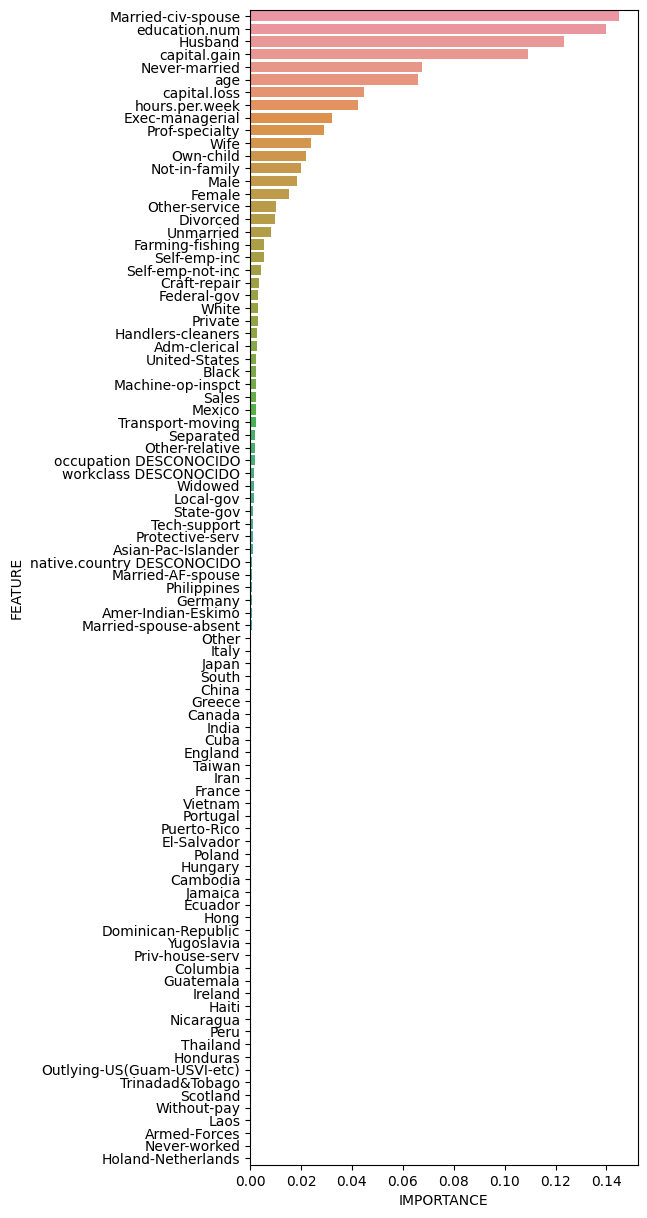

In [42]:
plt.figure(figsize=(5, 15))
sns.barplot(y=fi.FEATURE, x=fi.IMPORTANCE)
plt.show()

#Boosting

In [46]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(n_estimators=200)
%%time
lgbm.fit(X_train, y_train)

ModuleNotFoundError: No module named 'sklearn.lightgbm'

In [ ]:
y_train_pred = lgbm.predict(X_train)
y_test_pred = lgbm.predict(X_test)

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

lightboost = print(classification_report(y_test, y_test_pred))